<a href="https://colab.research.google.com/github/danishkhanbx/YBI-TaskProject/blob/master/Financial_Market_News_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Financial Market News Sentiment Analysis

**Objective:**
The objective of this project is to perform sentiment analysis on financial market news articles. We aim to build a machine learning model that can predict the sentiment (positive or negative) associated with financial news headlines.

**Data Source:**
The data for this project can be obtained from the following source:

Dataset: Financial Market News
Source: https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Financial%20Market%20News.csv

In [13]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [14]:
# Import Data
df = pd.read_csv(r'https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Financial%20Market%20News.csv', encoding="ISO-8859-1")


In [15]:
# Describe Data
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     4101 non-null   object
 1   Label    4101 non-null   int64 
 2   News 1   4101 non-null   object
 3   News 2   4101 non-null   object
 4   News 3   4101 non-null   object
 5   News 4   4101 non-null   object
 6   News 5   4101 non-null   object
 7   News 6   4101 non-null   object
 8   News 7   4101 non-null   object
 9   News 8   4101 non-null   object
 10  News 9   4101 non-null   object
 11  News 10  4101 non-null   object
 12  News 11  4101 non-null   object
 13  News 12  4101 non-null   object
 14  News 13  4101 non-null   object
 15  News 14  4101 non-null   object
 16  News 15  4101 non-null   object
 17  News 16  4101 non-null   object
 18  News 17  4101 non-null   object
 19  News 18  4101 non-null   object
 20  News 19  4101 non-null   object
 21  News 20  4101 non-null   object
 22  

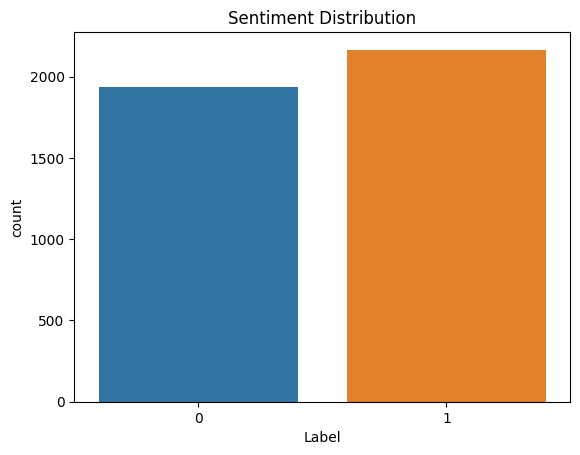

In [16]:
# Data Visualization
sns.countplot(x='Label', data=df)
plt.title('Sentiment Distribution')
plt.show()


In [17]:
# Data Preprocessing
X = df['News 1']  # Considering 'News 1' column for analysis
y = df['Label']


In [18]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Modeling
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_transformed, y_train)


LogisticRegression()

In [20]:
# Model Evaluation
y_pred = model.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.5200974421437271
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.41      0.44       376
           1       0.55      0.61      0.58       445

    accuracy                           0.52       821
   macro avg       0.51      0.51      0.51       821
weighted avg       0.52      0.52      0.52       821



In [21]:
# Prediction
example_headlines = ["Positive earnings report boosts stock prices",
                     "Company faces legal challenges impacting share prices",
                     "Market volatility expected due to economic uncertainty"]

example_transformed = vectorizer.transform(example_headlines)
predictions = model.predict(example_transformed)
print("Predictions:", predictions)


Predictions: [1 1 1]


# Explanation:
The project involves importing the necessary libraries, loading the financial market news dataset, performing data visualization, preprocessing the text data, splitting it into training and testing sets, training a logistic regression model with TF-IDF vectorization, evaluating its performance, and making predictions on new news headlines. The code provided follows these steps to achieve the objective of financial market news sentiment analysis.